#    BODYFAT PREDICTION

# importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# loading the dataset

In [2]:
data=pd.read_csv("bodyfat.csv")

In [3]:
data.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [4]:

data.tail()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8
251,1.0271,31.9,74,207.50,70.00,40.8,112.4,108.5,107.1,59.3,42.2,24.6,33.7,30.0,20.9


In [5]:


data.head(4).transpose()

,0,1,2,3
Density,1.0708,1.0853,1.0414,1.0751
BodyFat,12.3000,6.1000,25.3000,10.4000
Age,23.0000,22.0000,22.0000,26.0000
Weight,154.2500,173.2500,154.0000,184.7500
Height,67.7500,72.2500,66.2500,72.2500
Neck,36.2000,38.5000,34.0000,37.4000
Chest,93.1000,93.6000,95.8000,101.8000
Abdomen,85.2000,83.0000,87.9000,86.4000
Hip,94.5000,98.7000,99.2000,101.2000
Thigh,59.0000,58.7000,59.6000,60.1000


In [6]:
#checking is there any null values
data.isna().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64



# Data description and Exploration

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [8]:
data.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [9]:
data.shape

(252, 15)

In [10]:
data.Age.value_counts()[:10]

40    17
43    13
42    12
47    11
55    10
41    10
35    10
44     9
49     9
54     8
Name: Age, dtype: int64

# Data Visualization

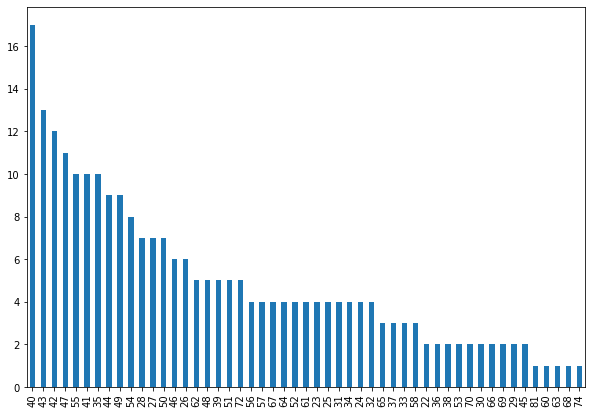

In [11]:
data["Age"].value_counts().plot(kind="bar",figsize=(10,7));

<AxesSubplot:>

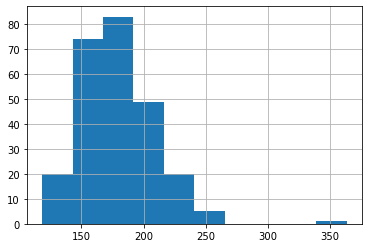

In [12]:
data["Weight"].hist()

<AxesSubplot:ylabel='Frequency'>

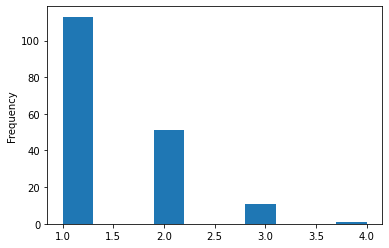

In [13]:
data["BodyFat"].value_counts().plot(kind="hist")

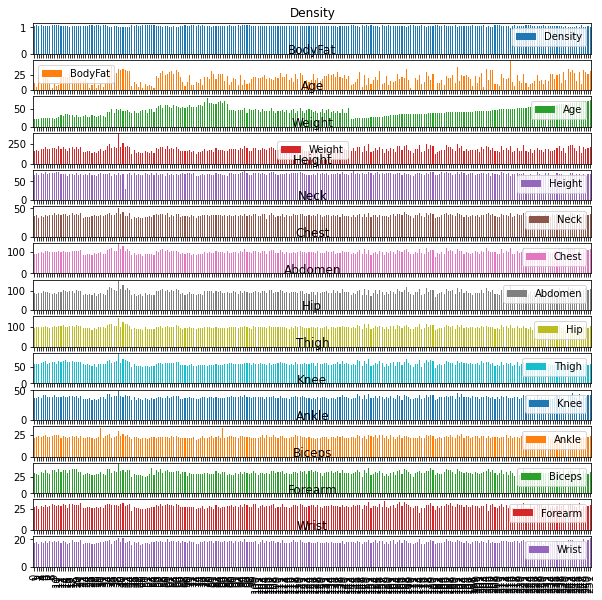

In [14]:
data.plot.bar(subplots=True,figsize=(10,10));

<BarContainer object of 252 artists>

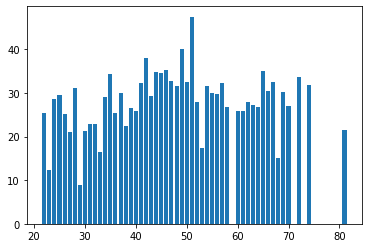

In [15]:
plt.bar(data["Age"],data["BodyFat"])

<AxesSubplot:>

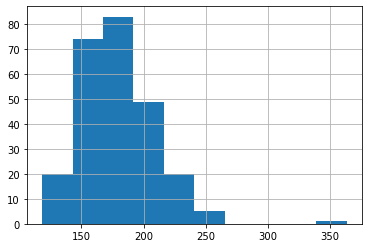

In [16]:
data["Weight"].hist()

In [17]:
 corr_matrix=data.corr()

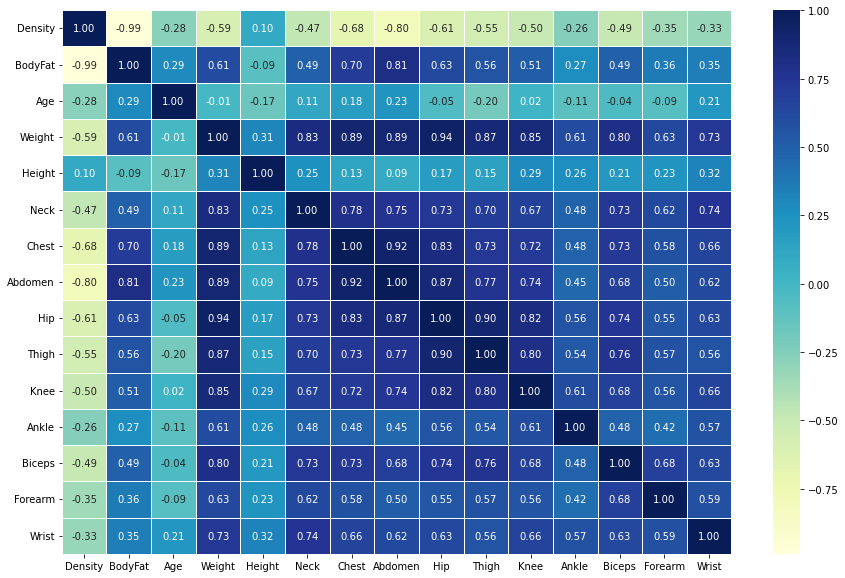

In [18]:
corr_matrix=data.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidth=0.5,
              fmt=".2f",cmap="YlGnBu")

In [19]:
data.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


# dividing into the x and y(features and labels)

In [20]:
x=data.drop("BodyFat",axis=1)

In [21]:
y=data["BodyFat"]

In [22]:
x.head()

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [23]:
x.shape

(252, 14)

In [24]:
y.head()

0    12.3
1     6.1
2    25.3
3    10.4
4    28.7
Name: BodyFat, dtype: float64

In [25]:
#dividing the data into the training and testing split


In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,
                                              test_size=0.2,
                                              random_state=42)

In [27]:
x_train.shape,x_test.shape

((201, 14), (51, 14))

In [28]:
y_train.shape,y_test.shape

((201,), (51,))

# At present we are working with the bodyfat prediction,it is a regression problem . In these we are using some of the Regression models to find the patterns in our data

In [29]:
from sklearn.linear_model import LinearRegression


In [30]:
model=LinearRegression()

In [31]:
#importing the Evolution metrics in the Regression problem

In [32]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score, mean_squared_log_error

# fitting and prediction of the data

In [33]:
model.fit(x_train,y_train)

LinearRegression()

In [34]:
y_pred=model.predict(x_test)

In [35]:
y_pred

array([19.59271786, 19.25132993, 27.5144811 , 20.49439227, 16.62347702,
       12.17832488, 22.45754518, 19.26046146, 11.81135483, 11.10082685,
       26.85123999, 24.7617182 , 15.37475212, 21.96096162,  6.73347306,
        5.2588979 , 21.13246408, 20.57942826, 20.60613753, 13.43160201,
       15.53802907, 17.30504659, 14.39780296, 13.75902534, 21.76987988,
       31.12268478, 24.38257394, 15.37910829,  7.28231284, 13.51538464,
       24.70795737, 10.58862512, 17.73370341, 19.27767267, 19.24523265,
        3.92063302, 21.2668048 , 16.06664544, 17.1432712 , 11.54703246,
       14.07144086, 23.99771079, 30.16706348,  9.18108694, 13.93485457,
       22.05598086, 28.20279151, 21.09188923, 23.19649365,  9.86485442,
       37.64293994])

In [36]:
r2=r2_score(y_test,y_pred)

In [37]:
r2

0.9918244198502362

In [38]:
mae=mean_absolute_error(y_test,y_pred)

In [39]:
mae

0.45953080513041816

In [40]:
mse=mean_squared_error(y_test,y_pred)

In [41]:
mse

0.3803122094772995

In [42]:
msle=mean_squared_log_error(y_test,y_pred)

In [43]:
msle

0.0009468607402544901

In [44]:
model.score(x_test,y_test)

0.9918244198502362

In [45]:
#checking with the RandomForest
from sklearn.ensemble import RandomForestRegressor

In [46]:
model_2=RandomForestRegressor()

In [47]:
model_2.fit(x_train,y_train)

RandomForestRegressor()

In [48]:
y_pred2=model_2.predict(x_test)

In [49]:
y_pred2[:10]

array([19.203, 19.213, 27.941, 20.39 , 16.66 , 12.419, 22.948, 18.628,
       11.743, 11.907])

In [50]:
r_2=r2_score(y_test,y_pred2)

In [51]:
r_2

0.9989380858641167

In [52]:
mae_2=mean_absolute_error(y_test,y_pred2)

In [53]:
mae_2

0.15411764705882217

In [54]:
mse_2=mean_squared_error(y_test,y_pred2)

In [55]:
mse_2

0.04939819607843139

In [56]:
model_2.score(x_test,y_test)

0.9989380858641167